In [1]:
import pandas as pd
import scipy as sp
from scipy import optimize as spo
import numpy as np
import matplotlib.pyplot as plt

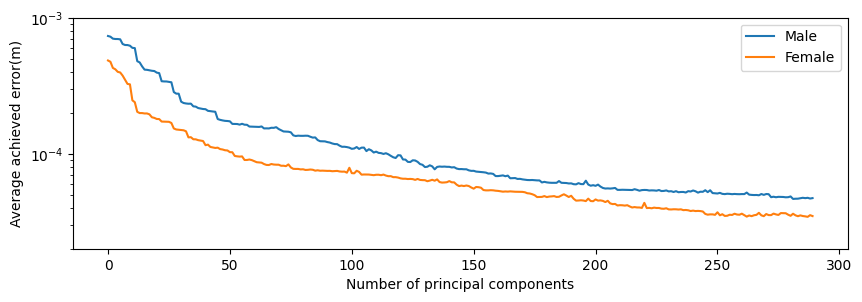

In [2]:
loss_300_df = pd.read_csv("status_data.csv", index_col=0)
filter_male = loss_300_df.gender == "male"
filter_female = loss_300_df.gender == "female"

loss_300_df_male = loss_300_df[filter_male]["loss"]
loss_300_df_male.rename("Male", inplace=True)
loss_300_df_male.reset_index(drop=True).plot(legend=True)
loss_300_df_female = loss_300_df[filter_female]["loss"]
loss_300_df_female.rename("Female", inplace=True)
loss_300_df_female.reset_index(drop=True).plot(legend=True, xlabel="Number of principal components", ylabel="Average achieved error(m)", logy=True, ylim=[2e-5, 1e-3], figsize=(10,3))
plt.show()

In [3]:
loss_steps_df = pd.read_csv("status_data_2.csv", index_col=0)
loss_steps_df

,gender,iteration,loss,elapsed_time,steps,steps interval
0,female,3430,0.000071,600.114703,5,50
1,female,3566,0.000206,600.066915,10,50
2,female,3544,0.000041,600.056231,15,50
3,female,3619,0.000101,600.154694,20,50
4,female,3618,0.000137,600.128335,25,50
...,...,...,...,...,...,...
595,female,3649,0.000015,600.054882,280,500
596,female,3622,0.000015,600.132600,285,500
597,female,3608,0.000016,600.098112,290,500
598,female,3632,0.000016,600.042415,295,500


Text(0, 0.5, 'Average error(m)')

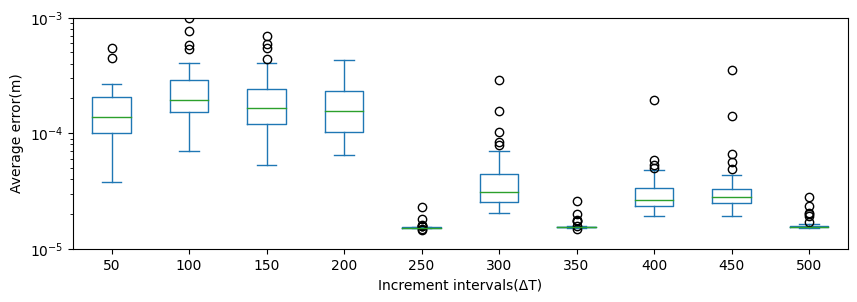

In [4]:
loss_steps_table = loss_steps_df.pivot(columns='steps', index='steps interval', values='loss')


ax = loss_steps_table.T.plot(kind='box', ylim=[1e-5, 1e-3], logy=True, figsize=(10,3))
ax.set_xlabel("Increment intervals(ΔT)")
ax.set_ylabel("Average error(m)")
#ax.set_title("Correlation between increment intervals(ΔT) and average error.")e


Text(0, 0.5, 'Number of iterations')

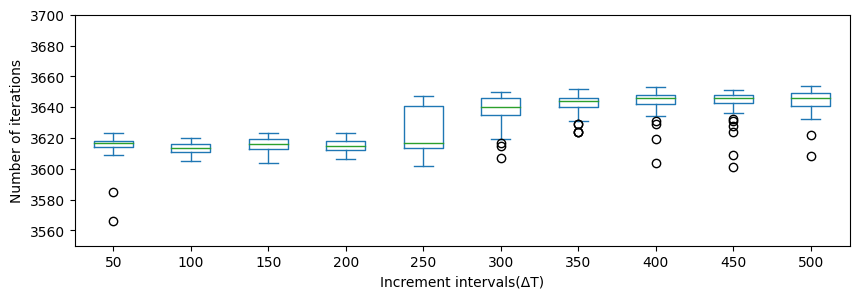

In [5]:
time_steps_table = loss_steps_df.pivot(columns='steps', index='steps interval', values='iteration')
ax = time_steps_table.T.plot(kind='box', ylim=[3550, 3700], figsize=(10,3))
ax.set_xlabel("Increment intervals(ΔT)")
ax.set_ylabel("Number of iterations")
#ax.set_title("Correlation between increment intervals(ΔT) and number of iterations.")



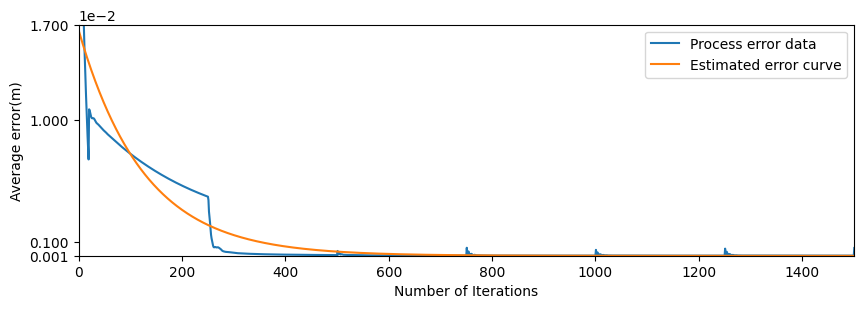

In [6]:
def exponential_function(x,a,b,c):
    return a*np.exp(-b*x) + c

loss_by_steps = pd.read_csv("status_data_3.csv", index_col=0)
x = loss_by_steps.index/1000
y = loss_by_steps.mean(axis=1)
fitting_parameters, _ = spo.curve_fit(exponential_function, x.to_numpy(), y.to_numpy())

fig, axe = plt.subplots(1, figsize=(10, 3))

fitted_y = exponential_function(x, *fitting_parameters)
fitted_y -= fitted_y.min()
fitted_data = pd.DataFrame({'x': loss_by_steps.index, 'y': fitted_y})
fitted_data.set_index('x', inplace=True)
fitted_data.columns = ['Estimated error curve']
loss_by_steps.mean(axis=1).rename("Process error data").plot(ax=axe, legend=True)
fitted_data.plot(ax=axe)

axe.set_ylim([1e-5, 1.7e-2])
axe.set_xlim([0, 1500])
axe.set_xlabel("Number of Iterations")
axe.set_ylabel("Average error(m)")
axe.set_yticks((1e-5, 1e-3, 1e-2, 1.7e-2))
axe.ticklabel_format(axis="y", style="scientific", scilimits=[-2, -5])
#axe.set_title("Average error according the number of optimization iterations")
plt.show()

In [7]:
loss_steps_df = pd.read_csv("status_data_4.csv", index_col=0)
time_to_goal = loss_steps_df.pivot(columns='steps', index=['steps interval', 'rep'], values='iteration')

In [8]:
loss_steps_df

,gender,iteration,loss,elapsed_time,steps,steps interval,rep
0,female,913,0.00002,158.400741,50,200,0
1,female,732,0.00002,127.454662,60,200,0
2,female,744,0.00002,126.049763,70,200,0
3,female,747,0.00002,124.118594,80,200,0
4,female,707,0.00002,117.653669,90,200,0
...,...,...,...,...,...,...,...
625,female,743,0.00002,247.850453,250,250,8
626,female,810,0.00002,271.136384,250,300,8
627,female,754,0.00002,250.380503,250,200,9
628,female,738,0.00002,245.550692,250,250,9


Text(0, 0.5, 'Number of iterations')

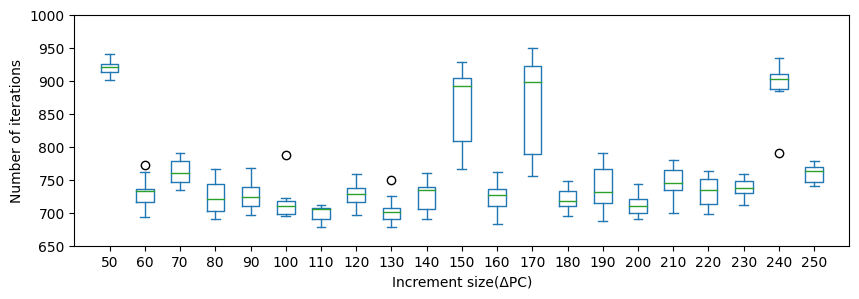

In [9]:
ax = time_to_goal.loc[200].plot(kind='box', ylim=[650, 1000], xlim=[0,22], figsize=(10,3))
#ax.set_title("Correlation between increment size(ΔPC) and number of iteration for 200 iterations interval")
ax.set_xlabel("Increment size(ΔPC)")
ax.set_ylabel("Number of iterations")

Text(0, 0.5, 'Number of iterations')

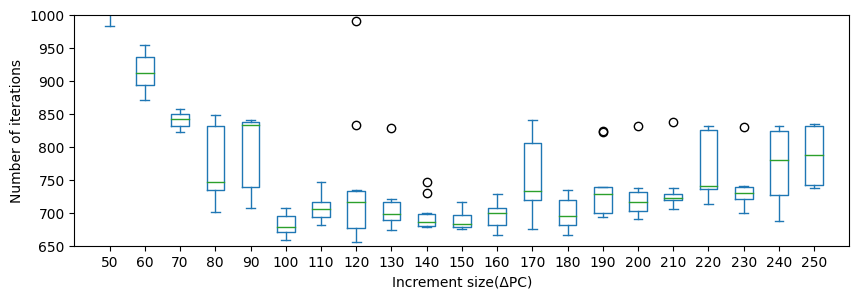

In [10]:
ax = time_to_goal.loc[250].plot(kind='box', ylim=[650, 1000], xlim=[0,22], figsize=(10,3))
#ax.set_title("Correlation between increment size(ΔPC) and number of iteration for 250 iterations interval")
ax.set_xlabel("Increment size(ΔPC)")
ax.set_ylabel("Number of iterations")

Text(0, 0.5, 'Number of iterations')

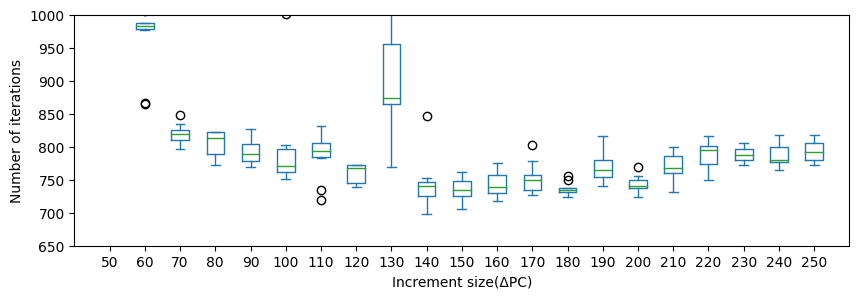

In [11]:
ax = time_to_goal.loc[300].plot(kind='box', ylim=[650, 1000], xlim=[0,22], figsize=(10,3))
#ax.set_title("Correlation between increment size(ΔPC) and number of iteration for 300 iterations interval")
ax.set_xlabel("Increment size(ΔPC)")
ax.set_ylabel("Number of iterations")

In [12]:
time_to_goal.index = time_to_goal.index.droplevel(1)

In [13]:
time_to_goal.reset_index().groupby("steps interval").mean().T.loc[100].sort_values().to_frame()

,100
steps interval,
250,682.6
200,715.6
300,822.2


In [14]:
time_to_goal.loc[250].mean().sort_values().to_frame()

,0
steps,
100,682.6
150,688.0
160,695.8
140,695.9
180,699.1
110,708.8
130,711.3
200,725.9
210,733.3
